## ECS 171 Discussion 2

```Date: Oct 4```

```TA: Dechen Gao```


* [Wine Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/wine).

The data is the results of a chemical analysis of wines grown in the same region in Italy but derived from different cultivars.

There are 13 different measurements taken from 3 types of wines (cultivators/grapevines).

---

## Part I

- EDA (Exploratory Data Analysis)
- Linear Regression
- Gradient Descent

## Part II

- Polynomial Regression
- Ridge and Lasso

## Libraries

- Data processing
  - [pandas](https://pandas.pydata.org/docs/reference/index.html#api)
- Visualization
  - [matplotlib](https://matplotlib.org/)
  - [seaborn](https://seaborn.pydata.org/index.html)
  - [plotly](https://plotly.com/python/)
  - Some built-ins

---

## Data Exploration

- Read in the Wine Dataset
- Describe the dataset
- Visualization
  - Distribution of one feature
  - Correlations between different features

### Read in the dataset

In [1]:
import pandas as pd

# Read the built-in dataset demo
from sklearn.datasets import load_wine
df, _ = load_wine(return_X_y=True, as_frame=True) 
df.head(5)

# Read locally
# df = pd.read_csv('wine.csv')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Basic information about the dataset

In [2]:
df.shape

(178, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Distribution of each feature

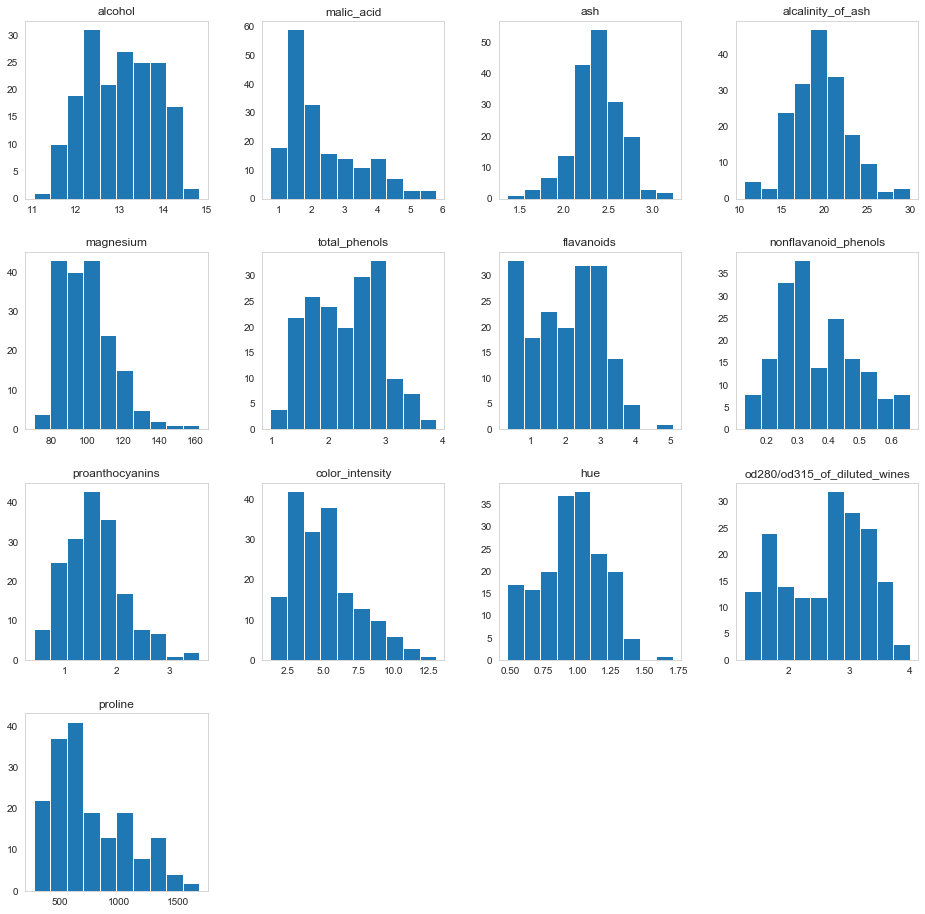

In [23]:
_ = df.hist(figsize=(16,16), grid=False)

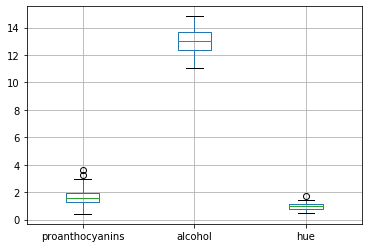

In [6]:
_ = df.boxplot(['proanthocyanins', 'alcohol', 'hue'])

### Correlation Coefficients

- **Pearson**
    - mostly used
    - measures linear association between two variables
    - with no assumption of causality
- Kendall
- Spearman


e.g. the strongest linear relationship lies between **flavanoids** and **total_phenols**

Therefore, linear regression for this pair is doable.

In [7]:
# Pearson correlation by default in pandas
corr = df.corr()
# This is an example using pandas built-in visualization
# Determine the background colors with data in each cell
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
malic_acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224
alcalinity_of_ash,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393
total_phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498
flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494
nonflavanoid_phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311
proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330
color_intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316


In [8]:
corr[corr<1.0].stack().max()

0.8645635000951156

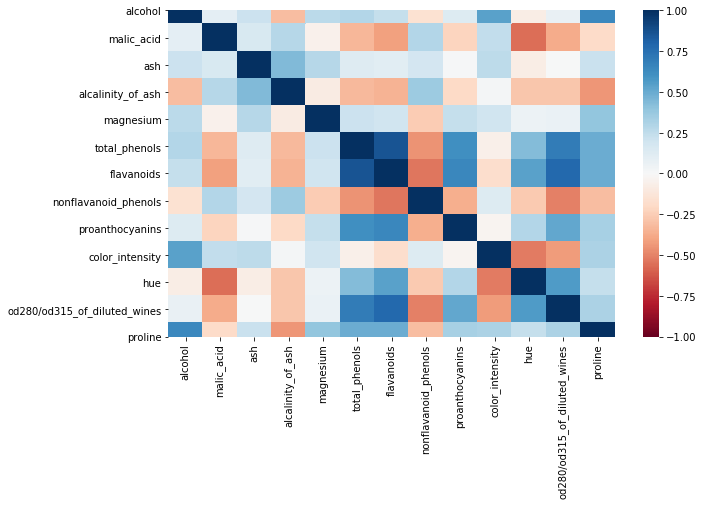

In [9]:
# This is an example using seaborn to plot
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=False, cmap= 'RdBu')

### Pairplot

Another way to visualize pairs of variables.

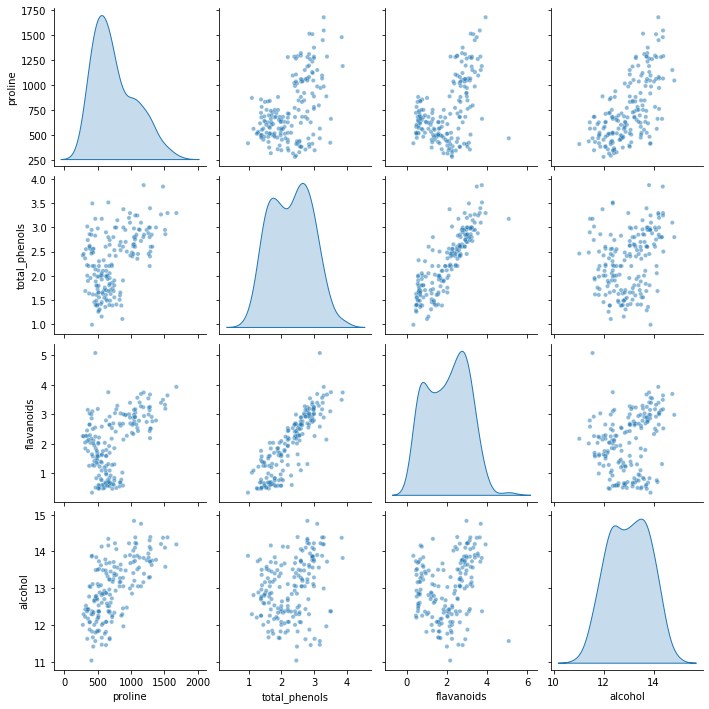

In [10]:
sns.pairplot(data=df,
             # Variables within data to use
             vars=['proline', 'total_phenols', 'flavanoids', 'alcohol'],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

---

## Linear Regression

- Multivariate visualization
  - See how different variables are correlated
  - Remove outliers
- Linear Regressor
  - Least Square
  - Gradient Descent

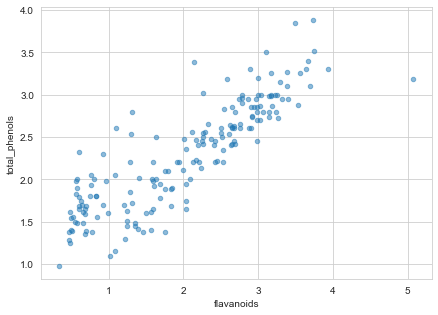

In [24]:
# Pandas built-in scatter plot
df.plot.scatter(x='flavanoids', y='total_phenols', alpha=.5, figsize=(7, 5))

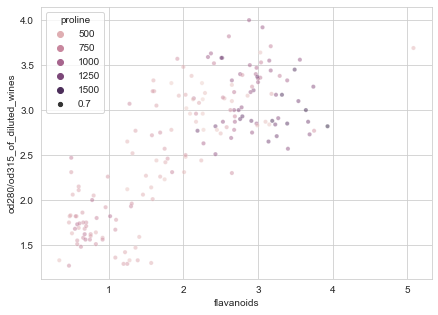

In [12]:
# e.g. change plot color style
sns.set_style('whitegrid')
# The same as using seaborn
# Scatter using seaborn
plt.figure(figsize=(7, 5))
# Try adding 'hue'
sns.scatterplot(data=df, x='flavanoids', y='od280/od315_of_diluted_wines', size=.7, alpha=.5, hue='proline')

### Linear Regression


#### Formulation of True Model

- Suppose $X$ is an $n\times (k + 1)$ matrix, where we observe $k$ independent variables for $n$ samples.

$$X={\begin{pmatrix}\mathbf {x} _{1}^{'}\\\mathbf {x} _{2}^{'}\\\vdots \\\mathbf {x} _{n}^{'}\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1k}\\1&x_{21}&\cdots &x_{2k}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{nk}\end{pmatrix}}$$

- Let $y$ be an $n\times 1$ vector of observations on the dependent variable (labels).
- Let $\epsilon$ be an $n\times 1$ vector of disturbances or errors.
- Let $\beta$ be an $k\times 1$ vectors of unknown parameters.

The true model can be written as $y=X\beta+\epsilon$.

And our goal is to generate a estimated model with parameters $\hat{\beta}$ that is close to the true model.

The residuals $e$ of the estimated model is given by:

$$
e=y-X\hat{\beta}
$$

**Notice** that $\epsilon \neq e$!

- $\epsilon$ refers to things that are unobservable in the real world (errors or disturbances in the observations).
- $e$ refers to the difference between observations and estimations. It can be observed and comes from the inaccuracy of estimated models.

#### Example of Wine

We are going to predict **total_phenols** with  **flavanoids**. Now, build a model fitting the linear relationship between two variables.

In this case, we have $k=1$ (one feature in total).

#### Least Square Regressor

[Matrix Proof](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf)

The sum of squared residuals:

$$
\sum_{i=1}^{n}e_{i}^{2}=e'e
$$

The goal is to minimize the sum of squared residuals via setting the derivatives to zero.

$$
\begin{aligned}
e'e &= (y − X\hat{\beta})'(y − X\hat{\beta})\\
&= (y'-\hat{\beta}'X')(y-X\hat{\beta})\\
&= y'y − \hat{\beta}'X'y − y'X\hat{\beta} + \hat{\beta}X'X\hat{\beta}\\
&= y'y − 2\hat{\beta}'X'y + \hat{\beta}'X'X\hat{\beta}
\end{aligned}
$$

Notice that $\hat{\beta}X'y$ and $y'X\hat{\beta}$ are both $1\times 1$ matrices (symmetric), and the transposition of a symmetric matrix is equal to itself. Therefore, we have $y'X\hat{\beta}=(y'X\hat{\beta})'=\hat{\beta}X'y$ the two factors are merged into one.

Take the derivatives of this with respect to $\hat{\beta}$.

$$
\frac{\partial e'e}{\partial \hat{\beta}} = -2X'y+2X'X\hat{\beta} = 0
$$

Matrix differentiation needed for $\hat{\beta}X'X\hat{\beta}$:

$$
\frac{\partial{v'Av}}{\partial{v}}=Av+A'v
$$

Now, we have:

$$
(X'X)\hat{\beta}=X'y
$$

Our goal is to obtain $\hat{\beta}$. Thus, we pre-multiply both sides with the inverse of $X'X$, i.e., $(X'X)^{-1}$, to eliminate $X'X$ on the left:

$$
(X'X)^{-1}(X'X)\hat{\beta}=(X'X)^{-1}X'y
$$

Finally, we get:

$$
\hat{\beta}=(X'X)^{-1}X'y
$$

Note that $X'X$ is a square matrix of size $k+1$ . How do we know whether the inverse of $X'X$ exists? It is invertible if and only if $k \leq n$ and $Rank(X)=k$. ([Proof](https://math.stackexchange.com/questions/691812/proof-of-when-is-a-xtx-invertible))

- Recall that all $k$ features are independent, so it meets the full-rank requirement.
- In practice, the number of features should be significantly smaller than the number of samples.

beta: [0.54170623 1.19584434]


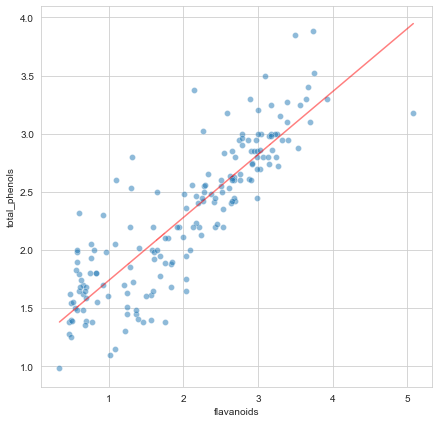

In [30]:
# Least Square Regressor
import numpy as np

x, y = df['flavanoids'].to_numpy(), df['total_phenols'].to_numpy()
A = np.vstack([x, np.ones(len(x))]).T
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print('beta:', beta)

# Plot the esitimated line with scatter plot
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='flavanoids', y='total_phenols', alpha=.5)
sns.lineplot(x=x, y=beta[0]*x+beta[1], color='r', alpha=.5)
# plt.plot(x, beta[0]*x+beta[1], color='r')
plt.show()

### Gradient Descent Regressor

#### Model Formulation

Let's denote the bias as $b$ and $\hat{\beta}_1$ as m, the model can be re-written as:

$$
\hat{y}=mx_{i} + b
$$

Now, take it into the MSE cost function:

$$
f(m,b) =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

The gradient can be calculated as:

$$
f'(m,b) =
   \begin{bmatrix}
     \frac{df}{dm}\\
     \frac{df}{db}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
    \end{bmatrix}
$$

The gradient is a vector whose components are the partial derivatives with respect to each $\hat{\beta}_i$ (parameters). This vector also indicates the direction of the greatest change of the function. It is a vector that points in the direction of the steepest ascent at the current position.

The idea of this algorithm is to take the opposite direction of the steepest ascent to reach the (local) minimum cost values.

A regressor iteratively calculates the gradient and scale it by $\eta$ (known as the learning rate), and substracts this stride to move to the next point (update the parameters).

<p align="center" width="100%">
  <img src="https://miro.medium.com/max/1200/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" width="600"/>
</p>

#### Gradient Descent Algorithms

-  **Batch Gradient Descent**: Also refered to as Gradient Descent. It involves calculating the error for the entire dataset during every epoch. Then the algorithm updates the model with the mean gradient calculated on all samples.
-  **Stochastic Gradient Descent (SGD)**: As opposed to running through the entire dataset, it picks up one sample randomly at a time to calculate the cost and update the model. This trait allows it to accomplish online machine learning. However, as it takes only one sample, more noise can be introduced into the model; and predictions can be slow, and cannot be vectorized.
-  **Mini-batch Gradient Descent**: Why not put the batch-based and stochastic algorithm together? At each epoch, a mini-batch is fed into the model. This batch has more than one samples and is smaller than the dataset.



#### Data Splitting

First, let's divide the dataset into the training set and test set.

In [37]:
# Split the dataset into train and test sets with a ratio of 4:1

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

X_train, X_test = train['flavanoids'], test['flavanoids']
y_train, y_test = train['total_phenols'], test['total_phenols']

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

reg = SGDRegressor()
reg.fit(X=np.asarray(X_train).reshape(-1, 1), y=y_train)
y_pred = reg.predict(X=np.asarray(X_train).reshape(-1, 1))
mse = mean_squared_error(y_train, y_pred)
print('Training MSE:', mse)

Training MSE: 0.11899769873852883


#### SGD Implementation

A simpler implementation using the built-ins from ```sklearn```.

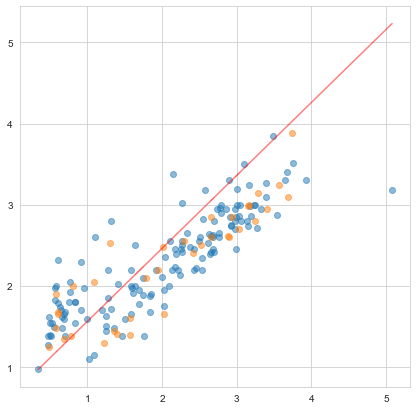

In [39]:
# Plot the esitimated line with scatter plot
plt.figure(figsize = (7, 7))
plt.scatter(x=X_train, y=y_train, alpha=.5)
plt.scatter(x=X_test, y=y_test, alpha=.5)
sns.lineplot(x=x, y=reg.intercept_*x+reg.coef_[0], color='r', alpha=.5)
plt.show()

#### Mini-batch Gradient Descent

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import random
import time

# Yield indexes of one batch at a time
def batch_iter(shuffled, batch_size):
    idx = 0
    num_samples = len(shuffled)
    while idx < num_samples:
        yield idx, min(idx+batch_size, num_samples)
        idx += batch_size


# num_epochs: How many iterations in training?
# batch_size: How many samples in a mini-batch?
def mini_batch_gd(num_epochs=100, batch_size=20):
    reg = SGDRegressor()

    cost_hist = []

    start_time = time.time()
    for _ in range(num_epochs):
        indexes = list(range(X_train.size))
        # Shuffle before each epoch
        random.shuffle(indexes)
        # Shuffle the dataframe
        shuffledX = X_train.iloc[indexes]
        shuffledY = y_train.iloc[indexes]
        # Iterate each mini-batch
        for batch in batch_iter(range(len(indexes)), batch_size):
            begin, end = batch[0], batch[-1] + 1
            # Obtain the features and labels
            X_part = np.asarray(shuffledX[begin:end]).reshape(-1, 1)
            y_part = shuffledY[begin:end]
            # Use partial_fit to fit into one mini-batch a time
            reg.partial_fit(X_part, y_part)
            # Record the training loss after evaluating this batch
        y_pred = reg.predict(X=np.asarray(X_train).reshape(-1, 1))
        cost_hist.append(mean_squared_error(y_train, y_pred))
    
    end_time = time.time()
    y_pred = reg.predict(X=np.asarray(X_train).reshape(-1, 1))
    mse = mean_squared_error(y_train, y_pred)
    print(f'Epochs: {num_epochs}, Batch: {batch_size}, Training MSE: {mse}, Time: {end_time-start_time}')
    return cost_hist


Epochs: 100, Batch: 1, Training MSE: 0.0982755263540181, Time: 5.2720513343811035
Epochs: 100, Batch: 20, Training MSE: 0.09867257820118534, Time: 0.35570478439331055
Epochs: 100, Batch: 40, Training MSE: 0.09870117089569863, Time: 0.24692296981811523
Epochs: 100, Batch: 60, Training MSE: 0.09871573640691984, Time: 0.18759751319885254


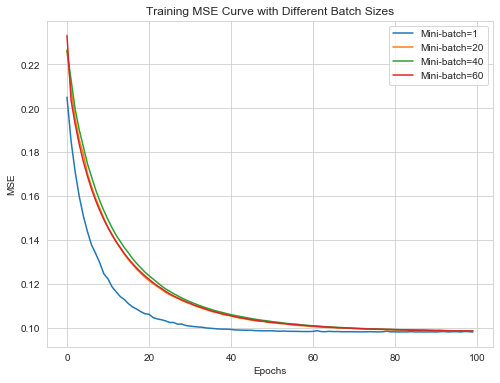

In [41]:
plt.figure(figsize=(8, 6))
for batch_size in [1, 20, 40, 60]:
    cost_hist = mini_batch_gd(num_epochs=100, batch_size=batch_size)
    plt.plot(cost_hist, label=f'Mini-batch={batch_size}')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training MSE Curve with Different Batch Sizes')
plt.legend()
plt.show()

---

## Polynomial Regression

### Formulation

Linear relationships may not hold in many settings. How to esimate non-linear relationships?

One way is to leverage non-linear models, such as neural networks with non-linear activation functions, to fit the data. Another way is that We can introduce non-linear factors into the input, by appending features of higher degrees to $X$ in our case. As the Taylor series suggests, we can approximate complex funtions with higher degree polynomials.

Let's model $y$ with an $n$-th degree polynomial.


$$y_{i}\,=\,\beta _{0}+\beta _{1}x_{i}+\beta _{2}x_{i}^{2}+\cdots +\beta _{k}x_{i}^{k}+\varepsilon _{i}\ (i=1,2,\dots ,n)$$

Similar to the least square proof in Linear Regression.

$$\hat{\beta}=(X'X)^{-1}X'y$$

Note that $X$ now turns into a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix):

$$X={\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{n-1}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{n-1}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{n-1}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{k}&x_{k}^{2}&\dots &x_{m}^{n-1}\end{bmatrix}}$$



### Implementation

- First, we need to determine the degree of a polynomial, which represents the highest power (largest exponent) in the polynomial.
- Next is creating new features according to the degree. ```sklearn``` provides ```PolynomialFeatures``` to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. Also, please note ```include_bias``` is set to ```False``` when applying the linear regression model. Since the linear regression contains biases itself.
- The problem can be solved with a classical linear regression problem.

In [ ]:
# A simple example of creating higher degree features
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=True)
demo = poly.fit_transform(np.arange(5).reshape(-1, 1))
# The Vandermonde matrix
pd.DataFrame(demo, columns=list(range(6)))

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0,32.0
3,1.0,3.0,9.0,27.0,81.0,243.0
4,1.0,4.0,16.0,64.0,256.0,1024.0


,b0,b1,b2,b3
0,"1,062.0569920940",-889.2348347952,402.8506334537,-41.1058250497


Training MSE: 26534.626126815856


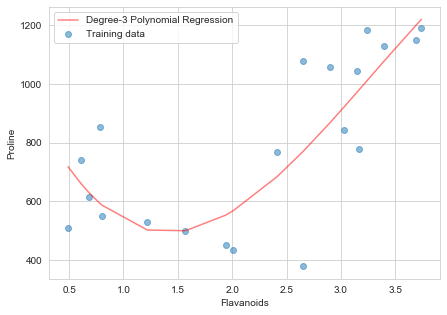

In [ ]:
# Code snippets based on Discussion_10-1.ipynb
from sklearn.linear_model import LinearRegression
from IPython.display import display

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    # Printing Coefficients
    coef = pd.DataFrame(polyReg.coef_, columns=[f'b{i+1}' for i in range(deg)])
    coef.insert(loc=0, column='b0', value=polyReg.intercept_)
    coef = coef.style.format("{:10,.10f}") # Comment this out to not suppressing the scientific notation
    display(coef)
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    print("Training MSE:", mean_squared_error(polyReg.predict(X_poly), y))
    
    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()

df_part = df.sample(20, random_state=21).sort_values(by=['flavanoids'])
X = np.asarray(df_part['flavanoids'])
y = np.asarray(df_part['proline'])
PolynomialRegression(X, y, deg=3)

## Regularization

### Underfitting

Poor performance & generalization: The model can neither learn from the training data, nor generalize it to other data.

The reason is that the model fails to capture the patterns within the data, often indicating a unsuitable model/algorithm.

### Overfitting:

The model tightly fits the trianing data, while also picking up the noise in data. That results in poor generliazation and thus bad performance on other data.

#### Signs of Overfitting

Low error rate and high variance: the training data has a low error rate, while the test data has a high error rate.

- Similar number of coefficients and samples.
- The testing error increases, while the training error drops over epochs.
- The testing error suddenly increases a lot.
- The training error suddenly decreses a lot.
- The values of parameters become unreasonably large compared to the scale in your data.

#### Reasons of Overfitting

The model is too complex for the data.

- Few data samples.
- Much data noise.
- Too many parameters (model complexity).

#### How to Avoid Overfitting?

- Early stopping: pause training before the model starts to learn noise.
- Add more data: the model is more likely to capture the real relationship between input and output.
- Reduce features: decrease the number of features via feature selection, keeping the important and highly correlated ones, eliminating redundancy and irrelevance.
- Regularization: add a penalty factor to coeficients to limit variance.

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20
0,"-18,836.7863902895","94,918.7814488461","-135,814.6268789121","-5,135.6371163327","112,765.7821607815","37,484.2967321724","-91,119.8778462198","-79,984.2132185465","55,044.5574115313","104,494.3233079861","-28,319.1599490329","-114,964.2479414742","44,934.0951465260","107,332.5193597010","-144,233.3065170863","87,725.2487701896","-32,091.9036208403","7,489.8179425792","-1,098.6150077791",92.7661870981,-3.4513550199


Training MSE: 17795.308626259095


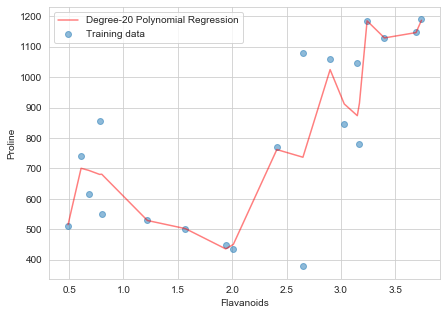

In [ ]:
PolynomialRegression(X, y, deg=20)

### Regularization

Regularization prevent overfitting penalizing the coefficients with a scaling factor $\lambda$.

We'll talk about **L1 Regularization** and **L2 Regularization** (also known as **Lasso Regression** and **Ridge Regression**).


### L1 Regularization

In L1 Regularization, the regularization term is $R_{l1} = \lambda \displaystyle \sum_{d=0}^{D}|\beta_{d}|$. Suppose the original cost function is denoted as $C$. The regularized cost function $C_{l1}$ is given by:

$$
\begin{align*}
C_{l1} &= C + R_{l1} \\
C_{l1} &= \sum_{i=1}^{M} (y_i - \sum_{d=0}^{D} (\beta_{d} x_i^d)) + \lambda \displaystyle \sum_{d=0}^{D}|\beta_{d}|
\end{align*}
$$

### L2 Regularization

In L2 Regularization, the regularization term is $R_{l2} = \lambda \displaystyle \sum_{j=0}^{n}\beta_{j}^2$. Suppose the original cost function is denoted as $C$. The regularized cost function $C_{l2}$ is given by:


$$
\begin{align*}
C_{l2} &= C + R_{l2} \\
C_{l2} &= \sum_{i=1}^{M} (y_i - \sum_{d=0}^{D} (\beta_{id} x_i^d)) + \lambda \displaystyle \sum_{j=0}^{n}\beta_{j}^2
\end{align*}
$$


### Visualization

Suppose we have a coefficient $w$. Let's set the derivative to 0 and find out where the penalty reaches its minimum. Notice that in this plot, both $l1$ and $l2$ becomes 0 on $w=0$.

However, $l2$ norms yield diminishing returns as $w$ approaches 0, while $l1$ always reduces the same amount when moving along the curve (constant derivatives). Thus, $l1$ is more often leveraged for spare solutions, whereas $l2$ discourages sparsity to some extent.

<p align="center" width="100%">
    <img src="https://miro.medium.com/max/700/1*bM2txQ6caL4AKiN19oH5bQ.gif" width="600"/>
</p>


,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15
0,"-1,414,007.8304299437","13,108,526.8760046232","-51,718,635.6721498743","111,567,894.4398594201","-135,653,913.2961920500","69,361,454.8291661590","51,823,952.3756142333","-131,647,683.8009870648","127,052,968.1534958780","-76,493,771.9835997820","31,482,842.1706587337","-9,043,746.3507125545","1,790,516.8202953876","-233,433.7424693308","18,063.5950798746",-629.0459814742
1,804.1834309634,-299.5675200351,47.9390041361,16.2671883333,1.8556036782,0.0699726838,0.0000000000,0.0000000000,-0.0000000000,-0.0000000000,-0.0000060335,-0.0000610656,-0.0000137985,-0.0000030946,-0.0000006921,-0.0000001534
2,590.4940621300,-6.8460707171,6.2858110397,2.7852056641,0.8315341684,0.2096182973,0.0474937273,0.0098182182,0.0018188186,0.0002785183,0.0000232126,-0.0000061292,-0.0000045660,-0.0000019100,-0.0000006723,-0.0000002176


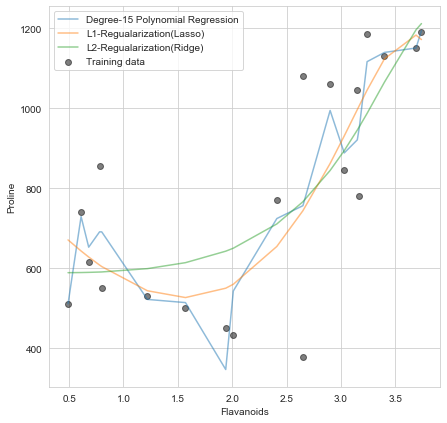

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from IPython.display import display

def RegularizedPolynomialRegression(X, y, deg=2, figsize=7, lamda=0.2):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Polynomial Regression
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    # Polynomial Regression with l1-regularization
    polyRegL1 = Lasso(alpha=lamda, normalize=True, tol=0.01).fit(X_poly, y.reshape(-1, 1))
    # Polynomial Regression with l2-regularization
    polyRegL2 = Ridge(alpha=lamda, normalize=True).fit(X_poly, y.reshape(-1, 1))
    
    # Printing Coefficients
    coef = np.concatenate((polyReg.coef_.reshape(1, -1), polyRegL1.coef_.reshape(1, -1), polyRegL2.coef_.reshape(1, -1)), axis=0)
    coef = pd.DataFrame(coef, columns=[f'b{i+1}' for i in range(deg)])
    intercepts = [polyReg.intercept_[0], polyRegL1.intercept_[0], polyRegL2.intercept_[0]]
    coef.insert(loc=0, column='b0', value=intercepts)
    coef = coef.style.format("{:10,.10f}") # Comment this out to not suppressing the scientific notation
    display(coef) 
    
    # Plotting
    plt.figure(figsize=(figsize, figsize))
    plt.scatter(X, y, color='k', alpha=.5)
    
    plt.plot(X, polyReg.predict(X_poly), color='tab:blue', alpha=.5)
    plt.plot(X, polyRegL1.predict(X_poly), color='tab:orange', alpha=.5)
    plt.plot(X, polyRegL2.predict(X_poly), color='tab:green', alpha=.5)

    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'L1-Regualarization(Lasso)', 'L2-Regualarization(Ridge)' ,'Training data'])
    plt.show()

RegularizedPolynomialRegression(X, y, deg=15)